In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# 열 선택
# 여러 열 선택시 새로운 데이터 프레임 반환
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,
                                                                      fish_target,
                                                                      random_state = 42)

In [9]:
# 세트 특성 표준화 전처리
# 꼭 훈련 세트에서 학습한 통계값으로 테스트 세트도 진행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 클래스 객체 생성
# 훈련 세트 모델 후 점수 확인
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)


KNeighborsClassifier(n_neighbors=3)

In [12]:
# 다중 분류
# 타깃 데이터에 2개 이상의 클래스 포함
# 타깃값 문자열은 사이킷런에서 자동 정렬
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
# 클래스별 확률 출력
# 소수점 네 번째 자리까지
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
# 확률의 가장 가까운 이웃의 비율 확인
# kneighbors()는 입력이 2차원이어야 한다.
# 슬라이싱은 하나의 샘플만 선택해도 항상 2차원 배열 생성
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


# 로지스틱 회귀
- 회귀지만 분류 모델
- 선형 회귀와 동일하게 선형 방정식 학습
- 확률로 바꾸기 위해 sigmoid 함수 사용

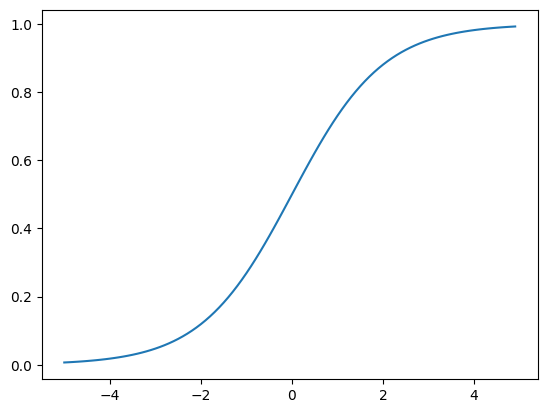

In [17]:
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi  = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.show()

In [ ]:
# 시그모이드는 이진 분류에서 0.5 기준 양/음 클래스
# 로지스틱 회귀로 이진 분류 - boolean indexing

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

# True만 반환하도록 Boolean
# == 'Bream' 에서 비트 OR 연산자 이용

In [20]:
bream_smelt_indexes = (train_target =='Bream') | (train_target =='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [21]:
# boolean 으로 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [23]:
# 모델 확률 예측 - 성능
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [24]:
# z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [26]:
# z를 시그모이드에 통과시키면 확률을 얻는다.
# predict_proba 와 동일한 값
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀로 다중 분류 수행하기

LogisticRegression
- max_iter() : 기본 100 반복 ~ 1000
- 릿지 회귀; 알파가 커지면 규제도 커짐
- C로 규제 케어, 규제와 반비례 (20)
- softmax 함수로 z값을 확률로 변환한다.
> 클래스마다 z값이 나오고 z값은 크면 좋음

**Softmax function**
- 0~1 값인데 총합이 1

In [34]:
# 데이터는 train_scaled와 train_target 이용
# c는 규제의 강도 제어 - 작을수록 강함 1.0
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))

0.9327731092436975


In [29]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [30]:
# test set 처음 5개 샘플 예측 확률 출력
# 열은 생선 개수, 행은 샘플 개수
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals =3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [31]:
# 클래스 정보 확인 classes_
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [32]:
# 다중 분류 예측 클래스 구하기
# 이진 분류에서 처럼 decision_function() 메서드로 z값을 구하고
# softmax로 확률로 바꾼다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals =2 ))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [33]:
# softmax 로 확률 변환
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 로지스틱 회귀로 확률 예측

분류 모델은 예측 뿐만 아니라 예측의 근거가 되는 확률 출력

**로지스틱 회귀**
- 선형으로 값을 출력하지만 0~1로 압축해 클래스를 확률로 이해할 수 있음
- 이진 분류에서는 하나의 선형 방정식 훈련
> 방정식 값을 softmax 로 0 ~ 1 변환
>> 음성 클래스 값은 1 - 양성 클래스 확률
- 다중 분류에서는 클래스 개수만큼 방정식 훈련
> softmax를 통과하면 총합이 1

**다중 분류**
타깃 클래스가 2개 이상인 분류 문제

**시그모이드 함수**

**소프트맥스 함수**

# 4.2. 확률적 경사 하강법
### Stocahstic Gradient Descent
*손실 함수, 에포크, 신경망 알고리즘*

경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배웁니다.

## 점진적인 학습
점진적 학습 알고리즘의 하나가 확률적 경사 하강법

> 데이터양 증가
>> ~이전 훈련 모델 버리기?~ 새로운 데이터만 조금 더 훈련

- 가장 가파른 길을
- 조금씩 내려온다.
- 길은 랜덤한 훈련 세트 한 개로만 학습한다.
- 이런 식으로 전체 훈련 세트를 사용한다.
== 에포크

# 미니배치 경사 하강법
### minibatch gardient descent

여러 개의 샘플을 이용해 경사 하강법 (한 경로) 수행
<> 한 개씩의 샘플 수행

# 배치 경사 하강법
한 번 경사로를 이동하기 위해 모든 샘플 사용

# loss function
*loss func 와 cost func는 엄격히 구분하지 않는다.*
- 손실 함수: 샘플 하나에 대한 손실
- 비용 함수: 훈련 세트 모든 샘플에 대한 손실 함수의 합

## 로지스틱 손실 함수
손실함수는 미분 가능해야 한다.
로지스틱 함수는 0~1의 값을 가지므로 손실 함수로 활용할 수 있다.
- 타깃이 양성이면 예측 *  타깃 ( 부호 변환 )
- 타깃이 음성이면 0이라서 다른 작업
> 타깃을 양성 클래스처럼 바꿔 (1), 예측값도 양성 클래스에 대한 예측으로 변경
( 1 - 예측값) = 예측 * 1 (음수)

# cross-entropy loss function
다중분류에서 사용하는 손실 함수

회귀에는 평균 절댓값 오차 사용
> mean squared error

In [36]:
# SGDClassifier
# 2 개의 매개변수 지정
# loss func 종류 지정
# max_iter 에포크 횟수
from sklearn.linear_model import SGDClassifier

In [39]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [43]:
# 1 에포크씩 훈련하기
# partial_fit()
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8067226890756303
0.8


### 에포크 횟수
- 적은 에포크: 훈련 모델 덜 학습
> 과소적합
- 많은 에포크: 훈련 세트 학습 반복
> 과대적합

**과대적합이 시작하기 전에 종료: 조기종료**

In [45]:
# 조기종료 예제
# partial_fit()만 이용
# 훈련 세트 전체 클래스의 레이블을 partial_fit() 메서드에 전달해주어야 한다.
# np.unique() 로 생선 목록 생성

train_score = []
test_score = []
classes = np.unique(train_target)

In [46]:
# 300 에포크 훈련
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

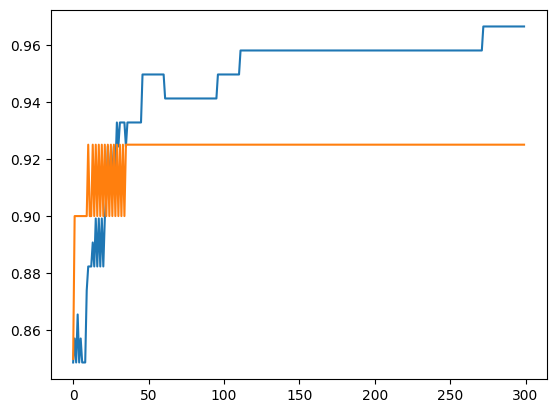

In [47]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

- max_iter 100으로 수정
- tol : 향상될 최솟값
- 일정 에포크 동안 성능이 향상되지 않으면 훈련을 자동으로 멈춘다.

## hinge loss
SVM을 위한 손실 함수


In [51]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
